In [1]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

  Stored in directory: C:\Users\User\AppData\Local\pip\Cache\wheels\9c\9b\f4\eb243fdb89676ec00588e8c54bb54360724c06e7fafe95278e
Successfully built tabulate


In [2]:
# The following command removes the H2O module for Python.
!pip uninstall h2o

# Next, use pip to install this version of the H2O Python module.
!pip install https://h2o-release.s3.amazonaws.com/h2o/master/4698/Python/h2o-3.25.0.4698-py2.py3-none-any.whl

In [1]:
import h2o
h2o.init(nthreads = -1, max_mem_size = 8)
h2o.connect()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,3 days 3 hours 1 min
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.25.0.4698
H2O cluster version age:,8 months and 27 days !!!
H2O cluster name:,H2O_from_python_User_136w9o
H2O cluster total nodes:,1
H2O cluster free memory:,6.933 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


Connecting to H2O server at http://localhost:54321 ... successful.


H2O cluster uptime:,3 days 3 hours 1 min
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.25.0.4698
H2O cluster version age:,8 months and 27 days !!!
H2O cluster name:,H2O_from_python_User_136w9o
H2O cluster total nodes:,1
H2O cluster free memory:,6.933 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


<H2OConnection to http://localhost:54321, no session>

In [ ]:
#Read Data

In [2]:
 data= h2o.import_file("segmm_product_classification.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [3]:
data=data.drop("C1")
data.columns

['MWG',
 'NWG',
 'KWG',
 'MDIMC',
 'NDIMC',
 'MDIMA',
 'NDIMB',
 'KWI',
 'VWM',
 'VWN',
 'STRM',
 'STRN',
 'SA',
 'SB',
 'run_class']

In [ ]:
#Variable & Predictor label

In [4]:
y="run_class"
X=list(data.columns).remove(y)


In [5]:
data[y] = data[y].asfactor()
data[y].type


run_class
0
0
0
0
0
1
1
0
1
1


<bound method H2OFrame.type of >

In [ ]:
#Train/Validation/Testing split

In [6]:
splits = data.split_frame(ratios=[0.6, 0.2], seed=1)
sgemm_train = splits[0]
sgemm_val = splits[1]
sgemm_test = splits[2]

In [ ]:
#Run Random Forest Estimator

In [7]:

from h2o.estimators.random_forest import H2ORandomForestEstimator
nFolds=5
rf = H2ORandomForestEstimator(nfolds = nFolds, fold_assignment = "Modulo",keep_cross_validation_predictions = True,

                                   min_rows = 4, ntrees = 100, max_depth = 6, balance_classes=True,

                                   stopping_metric = 'AUC', stopping_rounds = 3, stopping_tolerance = 1e-4, score_tree_interval = 10, seed = 1)



In [8]:
rf.train(x=X, y=y, training_frame=sgemm_train)


drf Model Build progress: |███████████████████████████████████████████████| 100%


In [9]:
y_pred_test = rf.predict(test_data=sgemm_test)


drf prediction progress: |████████████████████████████████████████████████| 100%


In [10]:
rf_performance_test = rf.model_performance(sgemm_test)
print(rf_performance_test)


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.08938800833005593
RMSE: 0.2989782740100958
LogLoss: 0.3003233953352297
Mean Per-Class Error: 0.08291901377449507
AUC: 0.9758794023511965
pr_auc: 0.9464887808143319
Gini: 0.951758804702393
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2978772120080493: 


,0,1,Error,Rate
0,13412.0,1275.0,0.0868,(1275.0/14687.0)
1,484.0,4859.0,0.0906,(484.0/5343.0)
Total,13896.0,6134.0,0.0878,(1759.0/20030.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2978772,0.8467370,203.0
max f2,0.2450809,0.9032383,231.0
max f0point5,0.4296743,0.9004428,138.0
max accuracy,0.3932164,0.9213679,155.0
max precision,0.8399587,1.0,0.0
max recall,0.0560943,1.0,358.0
max specificity,0.8399587,1.0,0.0
max absolute_mcc,0.3932164,0.7935630,155.0
max min_per_class_accuracy,0.2952707,0.9109416,205.0
max mean_per_class_accuracy,0.2670543,0.9170810,219.0


Gains/Lift Table: Avg response rate: 26.67 %, avg score: 23.06 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100349,0.7293398,3.7488302,3.7488302,1.0,0.7596918,1.0,0.7596918,0.0376193,0.0376193,274.8830245,274.8830245
,2,0.0200200,0.7009838,3.7488302,3.7488302,1.0,0.7131693,1.0,0.7364885,0.0374322,0.0750515,274.8830245,274.8830245
,3,0.0300050,0.6785834,3.7488302,3.7488302,1.0,0.6893084,1.0,0.7207880,0.0374322,0.1124836,274.8830245,274.8830245
,4,0.0400399,0.6619494,3.7488302,3.7488302,1.0,0.6692976,1.0,0.7078833,0.0376193,0.1501029,274.8830245,274.8830245
,5,0.0500250,0.6467297,3.7488302,3.7488302,1.0,0.6538474,1.0,0.6970977,0.0374322,0.1875351,274.8830245,274.8830245
,6,0.1,0.5790368,3.7488302,3.7488302,1.0,0.6113390,1.0,0.6542397,0.1873479,0.3748830,274.8830245,274.8830245
,7,0.1500250,0.5058682,3.7338649,3.7438401,0.9960080,0.5459236,0.9986689,0.6181224,0.1867864,0.5616695,273.3864855,274.3840122
,8,0.2,0.4159707,3.1383814,3.5925510,0.8371628,0.4575057,0.9583125,0.5779882,0.1568407,0.7185102,213.8381364,259.2551001
,9,0.3,0.3037101,1.8004866,2.9951962,0.4802796,0.3575247,0.7989682,0.5045004,0.1800487,0.8985589,80.0486618,199.5196207
,10,0.4,0.2047322,0.8216358,2.4518061,0.2191712,0.2509118,0.6540190,0.4411033,0.0821636,0.9807224,-17.8364215,145.1806101


In [85]:
rf_performance_test.auc()


0.977811886183843

In [86]:
rf_performance_test.confusion_matrix()

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.30664031827822097: 


,0,1,Error,Rate
0,13747.0,1023.0,0.0693,(1023.0/14770.0)
1,469.0,4791.0,0.0892,(469.0/5260.0)
Total,14216.0,5814.0,0.0745,(1492.0/20030.0)


In [11]:
rf_performance_test.accuracy


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.08938800833005593
RMSE: 0.2989782740100958
LogLoss: 0.3003233953352297
Mean Per-Class Error: 0.08291901377449507
AUC: 0.9758794023511965
pr_auc: 0.9464887808143319
Gini: 0.951758804702393
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2978772120080493: 


,0,1,Error,Rate
0,13412.0,1275.0,0.0868,(1275.0/14687.0)
1,484.0,4859.0,0.0906,(484.0/5343.0)
Total,13896.0,6134.0,0.0878,(1759.0/20030.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2978772,0.8467370,203.0
max f2,0.2450809,0.9032383,231.0
max f0point5,0.4296743,0.9004428,138.0
max accuracy,0.3932164,0.9213679,155.0
max precision,0.8399587,1.0,0.0
max recall,0.0560943,1.0,358.0
max specificity,0.8399587,1.0,0.0
max absolute_mcc,0.3932164,0.7935630,155.0
max min_per_class_accuracy,0.2952707,0.9109416,205.0
max mean_per_class_accuracy,0.2670543,0.9170810,219.0


Gains/Lift Table: Avg response rate: 26.67 %, avg score: 23.06 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100349,0.7293398,3.7488302,3.7488302,1.0,0.7596918,1.0,0.7596918,0.0376193,0.0376193,274.8830245,274.8830245
,2,0.0200200,0.7009838,3.7488302,3.7488302,1.0,0.7131693,1.0,0.7364885,0.0374322,0.0750515,274.8830245,274.8830245
,3,0.0300050,0.6785834,3.7488302,3.7488302,1.0,0.6893084,1.0,0.7207880,0.0374322,0.1124836,274.8830245,274.8830245
,4,0.0400399,0.6619494,3.7488302,3.7488302,1.0,0.6692976,1.0,0.7078833,0.0376193,0.1501029,274.8830245,274.8830245
,5,0.0500250,0.6467297,3.7488302,3.7488302,1.0,0.6538474,1.0,0.6970977,0.0374322,0.1875351,274.8830245,274.8830245
,6,0.1,0.5790368,3.7488302,3.7488302,1.0,0.6113390,1.0,0.6542397,0.1873479,0.3748830,274.8830245,274.8830245
,7,0.1500250,0.5058682,3.7338649,3.7438401,0.9960080,0.5459236,0.9986689,0.6181224,0.1867864,0.5616695,273.3864855,274.3840122
,8,0.2,0.4159707,3.1383814,3.5925510,0.8371628,0.4575057,0.9583125,0.5779882,0.1568407,0.7185102,213.8381364,259.2551001
,9,0.3,0.3037101,1.8004866,2.9951962,0.4802796,0.3575247,0.7989682,0.5045004,0.1800487,0.8985589,80.0486618,199.5196207
,10,0.4,0.2047322,0.8216358,2.4518061,0.2191712,0.2509118,0.6540190,0.4411033,0.0821636,0.9807224,-17.8364215,145.1806101


<bound method H2OBinomialModelMetrics.accuracy of >

In [87]:
rf.cross_validation_metrics_summary()

Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.9226016,0.0029574,0.9213858,0.9292139,0.9198868,0.9252165,0.9173051
auc,0.9766734,0.0012977,0.9753751,0.9787561,0.9753382,0.9790562,0.9748412
err,0.0773984,0.0029574,0.0786143,0.0707861,0.0801133,0.0747835,0.0826949
err_count,929.4,35.512253,944.0,850.0,962.0,898.0,993.0
f0point5,0.8363503,0.0121728,0.8363357,0.8657994,0.8270191,0.8390530,0.8135439
f1,0.8581155,0.0034134,0.8571429,0.8617436,0.8541098,0.8653269,0.8522542
f2,0.8815809,0.0094377,0.8790117,0.8577257,0.8830354,0.8932995,0.8948322
lift_top_group,3.8402264,0.0266120,3.791601,3.876049,3.8524222,3.8,3.8810601
logloss,0.2959396,0.0018431,0.2996700,0.2918453,0.2954113,0.2952422,0.2975290
max_per_class_error,0.1039797,0.0153646,0.1057783,0.1449322,0.0965672,0.0870253,0.0855957


In [13]:
rf_performance_val = rf.model_performance(sgemm_val)
print(rf_performance_val)


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.08735771007209135
RMSE: 0.2955633774202943
LogLoss: 0.29576374273692113
Mean Per-Class Error: 0.08292522896173171
AUC: 0.9743510316326925
pr_auc: 0.9452732102840771
Gini: 0.9487020632653851
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3277948143348147: 


,0,1,Error,Rate
0,13898.0,883.0,0.0597,(883.0/14781.0)
1,672.0,4477.0,0.1305,(672.0/5149.0)
Total,14570.0,5360.0,0.078,(1555.0/19930.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3277948,0.8520316,190.0
max f2,0.2424915,0.8979770,232.0
max f0point5,0.4188899,0.9008542,145.0
max accuracy,0.3775993,0.9244355,165.0
max precision,0.8449269,1.0,0.0
max recall,0.0518175,1.0,359.0
max specificity,0.8449269,1.0,0.0
max absolute_mcc,0.3277948,0.7993783,190.0
max min_per_class_accuracy,0.2934203,0.9140112,206.0
max mean_per_class_accuracy,0.2794690,0.9170748,213.0


Gains/Lift Table: Avg response rate: 25.84 %, avg score: 22.59 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100351,0.7311611,3.8706545,3.8706545,1.0,0.7596101,1.0,0.7596101,0.0388425,0.0388425,287.0654496,287.0654496
,2,0.0200201,0.7024300,3.8706545,3.8706545,1.0,0.7149912,1.0,0.7373566,0.0386483,0.0774908,287.0654496,287.0654496
,3,0.0300050,0.6812786,3.8706545,3.8706545,1.0,0.6918534,1.0,0.7222142,0.0386483,0.1161391,287.0654496,287.0654496
,4,0.0400401,0.6625947,3.8706545,3.8706545,1.0,0.6715430,1.0,0.7095147,0.0388425,0.1549815,287.0654496,287.0654496
,5,0.0500251,0.6440995,3.8706545,3.8706545,1.0,0.6531505,1.0,0.6982644,0.0386483,0.1936298,287.0654496,287.0654496
,6,0.1,0.5737331,3.8706545,3.8706545,1.0,0.6085366,1.0,0.6534231,0.1934356,0.3870654,287.0654496,287.0654496
,7,0.1500251,0.4938244,3.8357138,3.8590037,0.9909729,0.5394648,0.9969900,0.6154243,0.1918819,0.5789474,283.5713783,285.9003697
,8,0.2,0.4041956,3.1322766,3.6774131,0.8092369,0.4439040,0.9500753,0.5725657,0.1565352,0.7354826,213.2276630,267.7413090
,9,0.3,0.2923467,1.7906390,3.0484884,0.4626192,0.3471957,0.7875899,0.4974424,0.1790639,0.9145465,79.0638959,204.8488380
,10,0.4,0.1956789,0.6117693,2.4393086,0.1580532,0.2392810,0.6302057,0.4329020,0.0611769,0.9757234,-38.8230724,143.9308604


In [45]:
rf_performance_train = rf.model_performance(sgemm_train)
print(rf_performance_train)



ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.08738042977641282
RMSE: 0.29560180949448334
LogLoss: 0.2958312467808052
Mean Per-Class Error: 0.0786425846917278
AUC: 0.9763144608589066
pr_auc: 0.9482453399212494
Gini: 0.9526289217178132
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.30015002246975375: 


,0,1,Error,Rate
0,40779.0,3569.0,0.0805,(3569.0/44348.0)
1,1347.0,14345.0,0.0858,(1347.0/15692.0)
Total,42126.0,17914.0,0.0819,(4916.0/60040.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3001500,0.8537166,206.0
max f2,0.2477710,0.9024811,232.0
max f0point5,0.4279516,0.9029508,145.0
max accuracy,0.3708815,0.9243005,172.0
max precision,0.8392137,1.0,0.0
max recall,0.0548326,1.0,361.0
max specificity,0.8392137,1.0,0.0
max absolute_mcc,0.3001500,0.8005818,206.0
max min_per_class_accuracy,0.2960678,0.9167719,208.0
max mean_per_class_accuracy,0.2823874,0.9213574,215.0


Gains/Lift Table: Avg response rate: 26.14 %, avg score: 22.83 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100100,0.7304124,3.8261535,3.8261535,1.0,0.7601015,1.0,0.7601015,0.0382998,0.0382998,282.6153454,282.6153454
,2,0.0200033,0.7022099,3.8261535,3.8261535,1.0,0.7140682,1.0,0.7371040,0.0382360,0.0765358,282.6153454,282.6153454
,3,0.0300133,0.6795746,3.8261535,3.8261535,1.0,0.6911276,1.0,0.7217700,0.0382998,0.1148356,282.6153454,282.6153454
,4,0.0400067,0.6618044,3.8261535,3.8261535,1.0,0.6700494,1.0,0.7088506,0.0382360,0.1530716,282.6153454,282.6153454
,5,0.05,0.6456082,3.8261535,3.8261535,1.0,0.6535806,1.0,0.6978040,0.0382360,0.1913077,282.6153454,282.6153454
,6,0.1,0.5772665,3.8261535,3.8261535,1.0,0.6107337,1.0,0.6542688,0.1913077,0.3826153,282.6153454,282.6153454
,7,0.15,0.5025237,3.8083100,3.8202056,0.9953364,0.5420959,0.9984455,0.6168778,0.1904155,0.5730308,280.8309967,282.0205625
,8,0.2,0.4113965,3.1863370,3.6617385,0.8327781,0.4519226,0.9570286,0.5756390,0.1593168,0.7323477,218.6336987,266.1738465
,9,0.3,0.2972220,1.8391537,3.0542102,0.4806795,0.3531279,0.7982456,0.5014687,0.1839154,0.9162631,83.9153709,205.4210213
,10,0.4,0.1984932,0.6251593,2.4469475,0.1633911,0.2440575,0.6395320,0.4371159,0.0625159,0.9787790,-37.4840683,144.6947489


In [ ]:
#Plot AUC-ROC
rf_performance_val.plot()
rf_performance_test.plot()
rf_performance_train.plot()

In [ ]:
#Run Gradient Boosting Estimator

In [24]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

nFolds = 5

sampleRatePerClass = [0.62, 1]

gbm = H2OGradientBoostingEstimator(nfolds = nFolds, fold_assignment = "Modulo",keep_cross_validation_predictions = True,

                                   min_rows = 4, ntrees = 50, max_depth = 6, learn_rate = 0.01, balance_classes=True,

                                   stopping_metric = 'AUC', stopping_rounds = 3, stopping_tolerance = 1e-4, score_tree_interval = 10, seed = 1)

gbm.train(x = X, y = y, training_frame = sgemm_train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [25]:
y_pred_test = gbm.predict(test_data=sgemm_test)


gbm prediction progress: |████████████████████████████████████████████████| 100%


In [29]:
gbm_performance_test = gbm.model_performance(sgemm_test)
print(gbm_performance_test)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.12306591390249502
RMSE: 0.3508075168842524
LogLoss: 0.38949447398592774
Mean Per-Class Error: 0.07904105712460985
AUC: 0.9736240430597971
pr_auc: 0.8138613084535361
Gini: 0.9472480861195942
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3122980875602454: 


,0,1,Error,Rate
0,13084.0,1603.0,0.1091,(1603.0/14687.0)
1,272.0,5071.0,0.0509,(272.0/5343.0)
Total,13356.0,6674.0,0.0936,(1875.0/20030.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3122981,0.8439710,19.0
max f2,0.2619115,0.9109843,25.0
max f0point5,0.4207015,0.8684226,4.0
max accuracy,0.3344009,0.9096855,13.0
max precision,0.4506350,1.0,0.0
max recall,0.1393791,1.0,90.0
max specificity,0.4506350,1.0,0.0
max absolute_mcc,0.3122981,0.7880981,19.0
max min_per_class_accuracy,0.3157341,0.8914686,18.0
max mean_per_class_accuracy,0.3058194,0.9209589,21.0


Gains/Lift Table: Avg response rate: 26.67 %, avg score: 22.98 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0318522,0.4506350,3.7488302,3.7488302,1.0,0.4506350,1.0,0.4506350,0.1194086,0.1194086,274.8830245,274.8830245
,2,0.0588617,0.4490875,3.7488302,3.7488302,1.0,0.4490875,1.0,0.4499249,0.1012540,0.2206625,274.8830245,274.8830245
,3,0.1253620,0.4285055,3.7488302,3.7488302,1.0,0.4290445,1.0,0.4388486,0.2492981,0.4699607,274.8830245,274.8830245
,4,0.1517723,0.4207015,3.7488302,3.7488302,1.0,0.4207015,1.0,0.4356907,0.0990080,0.5689687,274.8830245,274.8830245
,5,0.2159760,0.3498533,2.2708700,3.3094736,0.6057543,0.3889732,0.8828017,0.4218029,0.1457982,0.7147670,127.0869954,230.9473580
,6,0.3037444,0.3181567,1.9597127,2.9194539,0.5227531,0.3351561,0.7787640,0.3967659,0.1720007,0.8867677,95.9712739,191.9453929
,7,0.4006490,0.2035591,1.1105499,2.4819358,0.2962391,0.2811652,0.6620561,0.3688057,0.1076174,0.9943852,11.0549918,148.1935837
,8,0.5051423,0.1387873,0.0537338,1.9796402,0.0143335,0.1534032,0.5280688,0.3242477,0.0056148,1.0,-94.6266169,97.9640245
,9,0.9426860,0.1332248,0.0,1.0607986,0.0,0.1334750,0.2829679,0.2357014,0.0,1.0,-100.0,6.0798644
,10,1.0,0.1299558,0.0,1.0,0.0,0.1328024,0.2667499,0.2298038,0.0,1.0,-100.0,0.0


In [30]:
gbm_performance_train = gbm.model_performance(sgemm_train)
print(gbm_performance_train)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.12081774386110054
RMSE: 0.3475884691141243
LogLoss: 0.3844003807207423
Mean Per-Class Error: 0.07725161222846189
AUC: 0.9752881187813548
pr_auc: 0.9136948487964627
Gini: 0.9505762375627096
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.311734531600495: 


,0,1,Error,Rate
0,39606.0,4742.0,0.1069,(4742.0/44348.0)
1,810.0,14882.0,0.0516,(810.0/15692.0)
Total,40416.0,19624.0,0.0925,(5552.0/60040.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3117345,0.8427908,96.0
max f2,0.2679442,0.9115449,116.0
max f0point5,0.3784654,0.8698970,43.0
max accuracy,0.3336059,0.9134577,68.0
max precision,0.4521450,1.0,0.0
max recall,0.1346313,1.0,362.0
max specificity,0.4521450,1.0,0.0
max absolute_mcc,0.3117345,0.7881997,96.0
max min_per_class_accuracy,0.3157007,0.9058756,86.0
max mean_per_class_accuracy,0.3044928,0.9227484,103.0


Gains/Lift Table: Avg response rate: 26.14 %, avg score: 22.79 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0126083,0.4517882,3.8261535,3.8261535,1.0,0.4519537,1.0,0.4519537,0.0482411,0.0482411,282.6153454,282.6153454
,2,0.0243504,0.4505796,3.8261535,3.8261535,1.0,0.4507081,1.0,0.4513530,0.0449274,0.0931685,282.6153454,282.6153454
,3,0.0352598,0.4493112,3.8261535,3.8261535,1.0,0.4497768,1.0,0.4508654,0.0417410,0.1349095,282.6153454,282.6153454
,4,0.0452532,0.4488536,3.8261535,3.8261535,1.0,0.4489995,1.0,0.4504533,0.0382360,0.1731456,282.6153454,282.6153454
,5,0.0533644,0.4478483,3.8261535,3.8261535,1.0,0.4482074,1.0,0.4501120,0.0310349,0.2041805,282.6153454,282.6153454
,6,0.1033811,0.4282438,3.8261535,3.8261535,1.0,0.4318443,1.0,0.4412739,0.1913714,0.3955519,282.6153454,282.6153454
,7,0.1544470,0.4165283,3.6714101,3.7749895,0.9595564,0.4228196,0.9866278,0.4351722,0.1874841,0.5830359,267.1410131,277.4989534
,8,0.2030646,0.3520190,2.4760548,3.4639995,0.6471394,0.3909237,0.9053478,0.4245783,0.1203798,0.7034158,147.6054770,246.3999494
,9,0.3005496,0.3167829,1.9820429,2.9833183,0.5180249,0.3362446,0.7797174,0.3959267,0.1932195,0.8966352,98.2042931,198.3318321
,10,0.4001332,0.1819834,0.9598980,2.4797373,0.2508781,0.2731790,0.6481019,0.3653778,0.0955901,0.9922253,-4.0101993,147.9737316



ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.11978749970201934
RMSE: 0.3461033078461102
LogLoss: 0.3819665609306185
Mean Per-Class Error: 0.07588238925983637
AUC: 0.9749627989373801
pr_auc: 0.8038417495825566
Gini: 0.9499255978747603
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.31229808756024535: 


,0,1,Error,Rate
0,13269.0,1512.0,0.1023,(1512.0/14781.0)
1,277.0,4872.0,0.0538,(277.0/5149.0)
Total,13546.0,6384.0,0.0898,(1789.0/19930.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3122981,0.8448799,19.0
max f2,0.2619115,0.9116685,25.0
max f0point5,0.4207015,0.8673682,4.0
max accuracy,0.3344009,0.9132965,13.0
max precision,0.4506350,1.0,0.0
max recall,0.1393791,1.0,88.0
max specificity,0.4506350,1.0,0.0
max absolute_mcc,0.3122981,0.7916940,19.0
max min_per_class_accuracy,0.3157341,0.8981124,18.0
max mean_per_class_accuracy,0.3057506,0.9241176,22.0


Gains/Lift Table: Avg response rate: 25.84 %, avg score: 22.64 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0337180,0.4506350,3.8706545,3.8706545,1.0,0.4506350,1.0,0.4506350,0.1305108,0.1305108,287.0654496,287.0654496
,2,0.0585549,0.4490875,3.8706545,3.8706545,1.0,0.4490875,1.0,0.4499786,0.0961352,0.2266460,287.0654496,287.0654496
,3,0.1214752,0.4285055,3.8706545,3.8706545,1.0,0.4290292,1.0,0.4391275,0.2435424,0.4701884,287.0654496,287.0654496
,4,0.1720522,0.4147108,3.0757879,3.6369929,0.7946429,0.4176646,0.9396325,0.4328182,0.1555642,0.6257526,207.5787948,263.6992939
,5,0.2071751,0.3498533,2.5103959,3.4459980,0.6485714,0.3696611,0.8902882,0.4221110,0.0881725,0.7139250,151.0395916,244.5998045
,6,0.3136979,0.3157341,1.9508245,2.9382799,0.5040038,0.3306495,0.7591171,0.3910533,0.2078073,0.9217324,95.0824452,193.8279949
,7,0.4013046,0.1713292,0.7980731,2.4710630,0.2061856,0.2564256,0.6384096,0.3616635,0.0699165,0.9916489,-20.1926908,147.1062998
,8,0.5040642,0.1369451,0.0812686,1.9838742,0.0209961,0.1472571,0.5125423,0.3179541,0.0083511,1.0,-91.8731375,98.3874179
,9,0.9417461,0.1332248,0.0,1.0618573,0.0,0.1333743,0.2743353,0.2321696,0.0,1.0,-100.0,6.1857318
,10,1.0,0.1299558,0.0,1.0,0.0,0.1327304,0.2583542,0.2263769,0.0,1.0,-100.0,0.0


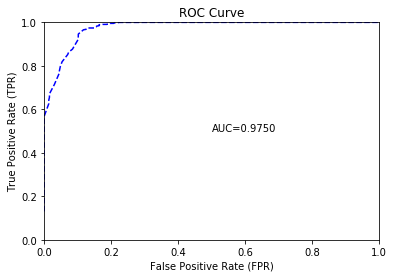

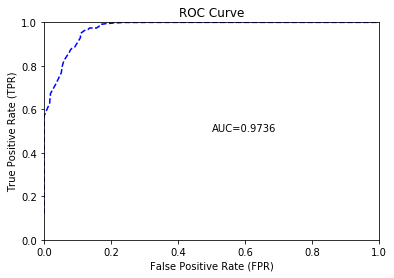

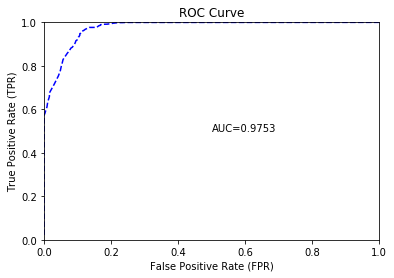

In [31]:
gbm_performance_val = gbm.model_performance(sgemm_val)
print(gbm_performance_val)
gbm_performance_val.plot()
gbm_performance_test.plot()
gbm_performance_train.plot()

In [ ]:
##Run Stacked Ensemble Estimator

In [34]:
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator

# metaLearnerParams = {'balance_classes': 'True'}

ensemble = H2OStackedEnsembleEstimator(base_models=[gbm, rf], metalearner_algorithm = "glm", # metalearner_params = metaLearnerParams,

                                       seed = 333)

ensemble.train(x = X, y = y, training_frame = sgemm_train)

ensemble.model_performance().auc()

stackedensemble Model Build progress: |███████████████████████████████████| 100%


0.9794100761902117

In [40]:
ensemble_train=ensemble.model_performance()
print(ensemble_train)


ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.04966906261224831
RMSE: 0.2228655707197689
LogLoss: 0.15685682894438094
Null degrees of freedom: 60039
Residual degrees of freedom: 60037
Null deviance: 68982.8009127425
Residual deviance: 18835.368019641264
AIC: 18841.368019641264
AUC: 0.9794100761902117
pr_auc: 0.9367715324906375
Gini: 0.9588201523804234
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34824383260916675: 


,0,1,Error,Rate
0,41046.0,3302.0,0.0745,(3302.0/44348.0)
1,1296.0,14396.0,0.0826,(1296.0/15692.0)
Total,42342.0,17698.0,0.0766,(4598.0/60040.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3482438,0.8622941,243.0
max f2,0.1480800,0.9139862,310.0
max f0point5,0.8417027,0.8897357,75.0
max accuracy,0.4616592,0.9238674,205.0
max precision,0.9980029,1.0,0.0
max recall,0.0046524,1.0,392.0
max specificity,0.9980029,1.0,0.0
max absolute_mcc,0.3482438,0.8123292,243.0
max min_per_class_accuracy,0.3324905,0.9220622,248.0
max mean_per_class_accuracy,0.2482415,0.9276576,277.0


Gains/Lift Table: Avg response rate: 26.14 %, avg score: 26.20 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100100,0.9963665,3.8261535,3.8261535,1.0,0.9973358,1.0,0.9973358,0.0382998,0.0382998,282.6153454,282.6153454
,2,0.0200033,0.9947822,3.8261535,3.8261535,1.0,0.9955737,1.0,0.9964555,0.0382360,0.0765358,282.6153454,282.6153454
,3,0.0300133,0.9932334,3.8261535,3.8261535,1.0,0.9940265,1.0,0.9956454,0.0382998,0.1148356,282.6153454,282.6153454
,4,0.0400067,0.9914015,3.8261535,3.8261535,1.0,0.9923258,1.0,0.9948161,0.0382360,0.1530716,282.6153454,282.6153454
,5,0.05,0.9896261,3.8261535,3.8261535,1.0,0.9905360,1.0,0.9939607,0.0382360,0.1913077,282.6153454,282.6153454
,6,0.1,0.9767971,3.8261535,3.8261535,1.0,0.9838232,1.0,0.9888919,0.1913077,0.3826153,282.6153454,282.6153454
,7,0.15,0.9376249,3.8146826,3.8223298,0.9970020,0.9634471,0.9990007,0.9804103,0.1907341,0.5733495,281.4682641,282.2329850
,8,0.2,0.7342582,2.9059393,3.5932322,0.7594937,0.8331592,0.9391239,0.9435975,0.1452970,0.7186464,190.5939332,259.3232220
,9,0.3,0.3232339,2.0609228,3.0824624,0.5386409,0.5421640,0.8056296,0.8097864,0.2060923,0.9247387,106.0922763,208.2462401
,10,0.4,0.0282363,0.6723171,2.4799261,0.1757162,0.1511304,0.6481512,0.6451224,0.0672317,0.9919704,-32.7682896,147.9926077


In [41]:
ensemble_test=ensemble.model_performance(sgemm_test)
print(ensemble_test)


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.05018158847708802
RMSE: 0.2240124739318952
LogLoss: 0.15950496303743278
Null degrees of freedom: 19929
Residual degrees of freedom: 19927
Null deviance: 22774.086696455855
Residual deviance: 6357.867826672071
AIC: 6363.867826672071
AUC: 0.9779178610155345
pr_auc: 0.934676617761284
Gini: 0.9558357220310689
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34734065664656705: 


,0,1,Error,Rate
0,13698.0,1083.0,0.0733,(1083.0/14781.0)
1,465.0,4684.0,0.0903,(465.0/5149.0)
Total,14163.0,5767.0,0.0777,(1548.0/19930.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3473407,0.8581898,242.0
max f2,0.1468494,0.9118065,314.0
max f0point5,0.7887555,0.8863184,92.0
max accuracy,0.4585940,0.9250878,205.0
max precision,0.9980520,1.0,0.0
max recall,0.0043409,1.0,392.0
max specificity,0.9980520,1.0,0.0
max absolute_mcc,0.3473407,0.8073947,242.0
max min_per_class_accuracy,0.3162200,0.9195589,254.0
max mean_per_class_accuracy,0.2372240,0.9253679,282.0


Gains/Lift Table: Avg response rate: 25.84 %, avg score: 25.73 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100351,0.9964700,3.8706545,3.8706545,1.0,0.9973423,1.0,0.9973423,0.0388425,0.0388425,287.0654496,287.0654496
,2,0.0200201,0.9947615,3.8706545,3.8706545,1.0,0.9955461,1.0,0.9964464,0.0386483,0.0774908,287.0654496,287.0654496
,3,0.0300050,0.9934097,3.8706545,3.8706545,1.0,0.9941699,1.0,0.9956888,0.0386483,0.1161391,287.0654496,287.0654496
,4,0.0400401,0.9916280,3.8706545,3.8706545,1.0,0.9925610,1.0,0.9949049,0.0388425,0.1549815,287.0654496,287.0654496
,5,0.0500251,0.9897657,3.8706545,3.8706545,1.0,0.9907243,1.0,0.9940705,0.0386483,0.1936298,287.0654496,287.0654496
,6,0.1,0.9760827,3.8706545,3.8706545,1.0,0.9833678,1.0,0.9887218,0.1934356,0.3870654,287.0654496,287.0654496
,7,0.1500251,0.9268705,3.8434784,3.8615928,0.9929789,0.9615669,0.9976589,0.9796671,0.1922703,0.5793358,284.3478386,286.1592763
,8,0.2,0.7207168,2.8796737,3.6162362,0.7439759,0.8146341,0.9342699,0.9384296,0.1439114,0.7232472,187.9673676,261.6236162
,9,0.3,0.3030106,2.0081569,3.0802097,0.5188159,0.5195003,0.7957852,0.7987865,0.2008157,0.9240629,100.8156924,208.0209749
,10,0.4,0.0249890,0.6642066,2.4762090,0.1716006,0.1387371,0.6397391,0.6337742,0.0664207,0.9904836,-33.5793358,147.6208973


In [42]:
ensemble_val=ensemble.model_performance(sgemm_val)
print(ensemble_val)


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.05018158847708802
RMSE: 0.2240124739318952
LogLoss: 0.15950496303743278
Null degrees of freedom: 19929
Residual degrees of freedom: 19927
Null deviance: 22774.086696455855
Residual deviance: 6357.867826672071
AIC: 6363.867826672071
AUC: 0.9779178610155345
pr_auc: 0.934676617761284
Gini: 0.9558357220310689
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34734065664656705: 


,0,1,Error,Rate
0,13698.0,1083.0,0.0733,(1083.0/14781.0)
1,465.0,4684.0,0.0903,(465.0/5149.0)
Total,14163.0,5767.0,0.0777,(1548.0/19930.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3473407,0.8581898,242.0
max f2,0.1468494,0.9118065,314.0
max f0point5,0.7887555,0.8863184,92.0
max accuracy,0.4585940,0.9250878,205.0
max precision,0.9980520,1.0,0.0
max recall,0.0043409,1.0,392.0
max specificity,0.9980520,1.0,0.0
max absolute_mcc,0.3473407,0.8073947,242.0
max min_per_class_accuracy,0.3162200,0.9195589,254.0
max mean_per_class_accuracy,0.2372240,0.9253679,282.0


Gains/Lift Table: Avg response rate: 25.84 %, avg score: 25.73 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100351,0.9964700,3.8706545,3.8706545,1.0,0.9973423,1.0,0.9973423,0.0388425,0.0388425,287.0654496,287.0654496
,2,0.0200201,0.9947615,3.8706545,3.8706545,1.0,0.9955461,1.0,0.9964464,0.0386483,0.0774908,287.0654496,287.0654496
,3,0.0300050,0.9934097,3.8706545,3.8706545,1.0,0.9941699,1.0,0.9956888,0.0386483,0.1161391,287.0654496,287.0654496
,4,0.0400401,0.9916280,3.8706545,3.8706545,1.0,0.9925610,1.0,0.9949049,0.0388425,0.1549815,287.0654496,287.0654496
,5,0.0500251,0.9897657,3.8706545,3.8706545,1.0,0.9907243,1.0,0.9940705,0.0386483,0.1936298,287.0654496,287.0654496
,6,0.1,0.9760827,3.8706545,3.8706545,1.0,0.9833678,1.0,0.9887218,0.1934356,0.3870654,287.0654496,287.0654496
,7,0.1500251,0.9268705,3.8434784,3.8615928,0.9929789,0.9615669,0.9976589,0.9796671,0.1922703,0.5793358,284.3478386,286.1592763
,8,0.2,0.7207168,2.8796737,3.6162362,0.7439759,0.8146341,0.9342699,0.9384296,0.1439114,0.7232472,187.9673676,261.6236162
,9,0.3,0.3030106,2.0081569,3.0802097,0.5188159,0.5195003,0.7957852,0.7987865,0.2008157,0.9240629,100.8156924,208.0209749
,10,0.4,0.0249890,0.6642066,2.4762090,0.1716006,0.1387371,0.6397391,0.6337742,0.0664207,0.9904836,-33.5793358,147.6208973


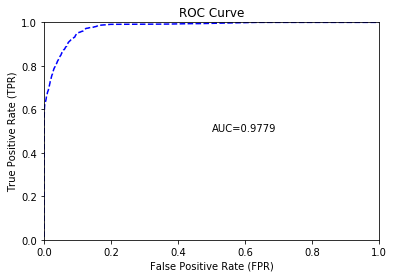

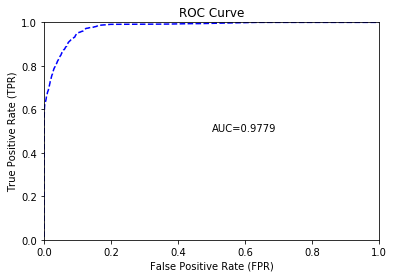

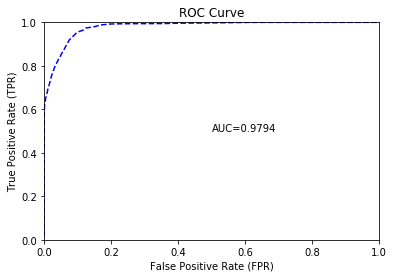

In [43]:
ensemble_test.plot()
ensemble_val.plot()
ensemble_train.plot()

In [ ]:
#Variable Importance of Random Forest

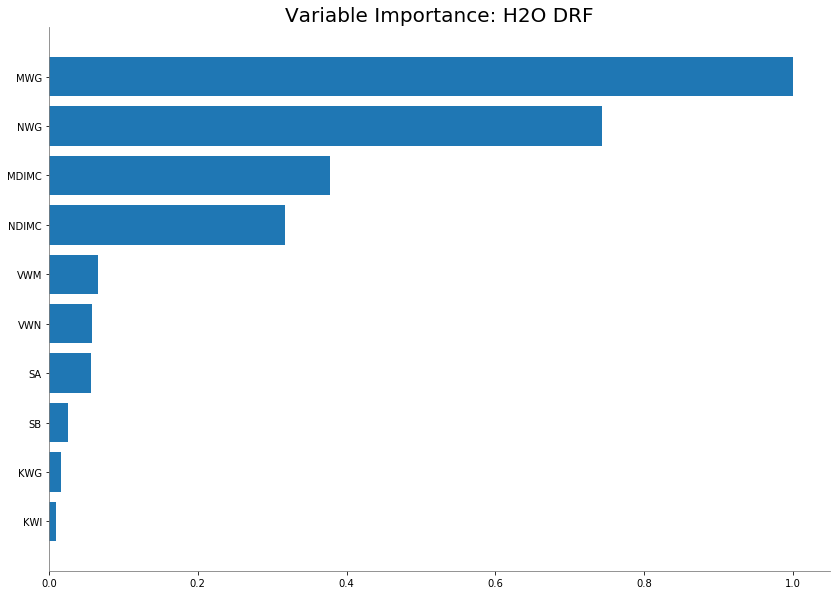

In [44]:
rf.varimp_plot()